In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Importo libreria para trabajar con dates 
from datetime import timedelta
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
import re

# Libreria para estimar regresión
import statsmodels.api as sm

# Para forwad selection
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Primero levantamos nuestro dataset desde github
url = "https://raw.githubusercontent.com/JnAlvarez/Coder-DS/main/New_York_cars.csv"
df = pd.read_csv(url)

## Abstract/ Problema comercial

<div style='text-align: justify;'>

    Este proyecto de Data Science se enfoca en la creación de un modelo de predicción de precios para automóviles nuevos y usados a partir de una base de datos exhaustiva que abarca una amplia gama de características y detalles históricos de precios. El objetivo principal es desarrollar un modelo predictivo robusto y preciso que permita a compradores y vendedores estimar el valor justo de un automóvil en función de sus especificaciones.

    La base de datos contiene información detallada, como si el automóvil es nuevo o usado, el tipo de motor, la carrocería, el rendimiento, las opciones de entretenimiento, los extras y otros atributos relevantes. A través de técnicas avanzadas de análisis de datos y aprendizaje automático, se explorarán patrones, relaciones y correlaciones en los datos para construir un modelo predictivo que sea capaz de proporcionar estimaciones precisas de los precios de los automóviles.

    El proceso de desarrollo del modelo se divide en varias etapas, que incluyen la limpieza y preprocesamiento de datos, la selección de características relevantes, la elección de algoritmos de aprendizaje automático adecuados y la evaluación de su rendimiento. Además, se implementarán medidas de evaluación de calidad, como el error cuadrático medio y el coeficiente de determinación (R²), para garantizar la fiabilidad del modelo.

    Los resultados de este proyecto no solo serán útiles para los compradores y vendedores de automóviles, sino que también tendrán aplicaciones potenciales en la toma de decisiones estratégicas para la industria automotriz. Además, contribuirá al avance del campo de Data Science al abordar un problema práctico y complejo, demostrando la utilidad de las técnicas analíticas y predictivas en la valoración de activos.

    En última instancia, este proyecto busca mejorar la transparencia y la equidad en el mercado de automóviles al proporcionar una herramienta precisa y objetiva para la determinación de precios, lo que beneficia tanto a compradores como a vendedores en sus decisiones de compra y venta.

</div>

## Hipótesis

Junto con estructurar un modelo que nos permita predecir correctamente el valor de automóviles de acuerdo a sus características, intentaremos además responder ciertas preguntas que nos permitan entender de mejor manera el modelo.

**Hipótesis Primaria:**
Los vehículos nuevos tienen un precio promedio significativamente más alto que los vehículos usados en la base de datos.

**Hipótesis Secundaria 1:**
El tipo de combustible afecta de manera significativa el precio de los vehículos.

**Hipótesis Secundaria 2:**
El tipo de transmisión influye en el precio siendo el 4x4 el más caro.

**Hipótesis Secundaria 3:**
La eficiencia de combustible (medida en millas por galón, mpg) está positivamente correlacionada con el precio de los vehículos, lo que significa que los vehículos más eficientes en combustible tienden a tener un precio promedio más alto en el mercado.

## Explorando el dataset

In [3]:
# Exploramos someramente nuestro dataset para hacernos una idea de los datos aquí contenidos.
print("------------------------ SHAPE ------------------------")
print(df.shape)
print("------------------------ HEAD -------------------------")
print(df.head())
print("------------------------ INFO -------------------------")
print(df.info())
print("------------------------ NULL -------------------------")
print(df.isnull().sum())

------------------------ SHAPE ------------------------
(175490, 24)
------------------------ HEAD -------------------------
  new&used                                  name  money  \
0      New               2023 Acura Integra Base  33095   
1      New                 2023 Acura Mdx A-Spec  61745   
2      New  2023 Acura Integra A-Spec Technology  38095   
3      New                 2023 Acura Tlx A-Spec  47995   
4      New                 2023 Acura Tlx A-Spec  47995   

             Exterior color Interior color Drivetrain     MPG Fuel type  \
0   Liquid Carbon Metallic          Ebony         Fwd   30–37  Gasoline   
1     Majestic Black Pearl          Ebony         Awd   19–25  Gasoline   
2     Majestic Black Pearl          Ebony         Fwd   26–36  Gasoline   
3     Majestic Black Pearl          Ebony         Fwd   22–30  Gasoline   
4     Platinum White Pearl            Red         Fwd   22–30  Gasoline   

         Transmission                      Engine  ...  \
0       Aut

## Estructurando el dataset

<div style='text-align: justify;'>    
    Hemos podido observar que las columnas: 'Convenience', 'Entertainment', 'Seating', 'Safety' y 'Exterior', poseen información alfanumérica pobremente ordenada, sin separadores. Lo que haremos para poder obtener información con la que podamos trabajar de mejor manera será añadir nuevas columnas con el nombre de cada característica contenida en las columnas mencionadas al principio, y llenarlas con un 1 si el string aparece en la columna correspondiente y con un 0 en cualquier otro caso.
</div>

In [4]:
# Agregar las columnas
df['Adaptive Cruise Control'] = 0
df['Heated Seats'] = 0
df['Cooled Seats'] = 0
df['Keyless Start'] = 0
df['Navigation System'] = 0
df['Power Liftgate'] = 0
df['Remote Start'] = 0
df['Heated Steering Wheel'] = 0

# Nombres a buscar
nombres_a_buscar = ['Adaptive Cruise Control', 'Heated Seats', 'Cooled Seats', 'Keyless Start', 'Navigation System', 'Power Liftgate', 'Remote Start', 'Heated Steering Wheel']

# Iterar a través de las filas
for index, row in df.iterrows():
    convenience_value = row['Convenience']
    if isinstance(convenience_value, str):
        for nombre in nombres_a_buscar:
            if nombre in convenience_value:
                df.loc[index, nombre] = 1

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Convenience'])

In [5]:
# Agregar las columnas
df['Apple CarPlay/Android Auto'] = 0
df['USB Port'] = 0
df['Premium Sound System'] = 0
df['Bluetooth'] = 0
df['HomeLink'] = 0
df['Rear Seat Entertainment'] = 0

# Nombres a buscar
nombres_a_buscar = ['Apple CarPlay/Android Auto', 'USB Port', 'Premium Sound System', 'Bluetooth', 'HomeLink', 'Rear Seat Entertainment']

# Iterar a través de las filas
for index, row in df.iterrows():
    entertainment_value = row['Entertainment']
    if isinstance(entertainment_value, str):
        for nombre in nombres_a_buscar:
            if nombre in entertainment_value:
                df.loc[index, nombre] = 1

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Entertainment'])

In [6]:
# Agregar las columnas
df['Memory Seat'] = 0
df['Third Row Seating'] = 0
df['Leather Seats'] = 0

# Nombres a buscar
nombres_a_buscar = ['Memory Seat', 'Third Row Seating', 'Leather Seats']

# Iterar a través de las filas
for index, row in df.iterrows():
    row_str = str(row['Seating'])  # Convertir a cadena
    for nombre in nombres_a_buscar:
        if nombre in row_str:
            df.loc[index, nombre] = 1

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Seating'])

In [7]:
# Agregar las columnas
df['Blind Spot Monitor'] = 0
df['Rear Cross Traffic Alert'] = 0
df['Backup Camera'] = 0
df['Lane Departure Warning'] = 0

# Nombres a buscar
nombres_a_buscar = ['Blind Spot Monitor', 'Rear Cross Traffic Alert', 'Backup Camera', 'Lane Departure Warning']

# Iterar a través de las filas
for index, row in df.iterrows():
    safety_value = row['Safety']
    if isinstance(safety_value, str):
        for nombre in nombres_a_buscar:
            if nombre in safety_value:
                df.loc[index, nombre] = 1

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Safety'])

In [8]:
# Agregar las columnas
df['Alloy Wheels'] = 0
df['Sunroof/Moonroof'] = 0
df['Tow Hitch'] = 0
df['Tow Hooks'] = 0

# Nombres a buscar
nombres_a_buscar = ['Alloy Wheels', 'Sunroof/Moonroof', 'Tow Hitch', 'Tow Hooks']

# Iterar a través de las filas
for index, row in df.iterrows():
    exterior_value = row['Exterior']
    if isinstance(exterior_value, str):
        for nombre in nombres_a_buscar:
            if nombre in exterior_value:
                df.loc[index, nombre] = 1

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Exterior'])

In [9]:
# Printeamos un Info para ver la nueva estructura
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175490 entries, 0 to 175489
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   new&used                    175490 non-null  object 
 1   name                        175490 non-null  object 
 2   money                       175490 non-null  int64  
 3   Exterior color              173598 non-null  object 
 4   Interior color              160594 non-null  object 
 5   Drivetrain                  174934 non-null  object 
 6   MPG                         143406 non-null  object 
 7   Fuel type                   174147 non-null  object 
 8   Transmission                174726 non-null  object 
 9   Engine                      175158 non-null  object 
 10  Mileage                     175443 non-null  float64
 11  Accidents or damage         122916 non-null  object 
 12  Clean title     

Ahora vamos a transformar la columna new&used para dejarla como una columna numérica que indique un 1 para los autos nuevos y un cero para todo lo demás.

In [10]:
conteo_valores = df['new&used'].value_counts()
print("------------------------ V.COUNT -------------------------")
print(conteo_valores)

------------------------ V.COUNT -------------------------
new&used
Used                       135972
New                         29280
Mercedes-Benz Certified       778
Infiniti Certified            705
Porsche Certified             659
Toyota Certified              629
Volvo Certified               617
Honda Certified               615
Cadillac Certified            608
Bmw Certified                 580
Nissan Certified              501
Buick Certified               498
Volkswagen Certified          496
Subaru Certified              445
Jeep Certified                427
Acura Certified               416
Gmc Certified                 375
Kia Certified                 358
Ford Certified                354
Dodge Certified               323
Chevrolet Certified           316
Chrysler Certified            298
Ram Certified                 236
Mitsubishi Certified            4
Name: count, dtype: int64


Convertiremos esta columna a valores binarios teniendo en cuenta que los vehículos certificados son vehículos usados.

In [11]:
# Función para asignar 1 a 'New' cuando 'new&used' es 'new' y 0 en otros casos
def asignar_new(row):
    if row['new&used'] == 'New':
        return 1
    else:
        return 0

# Crear la nueva columna 'New' utilizando apply
df['New'] = df.apply(asignar_new, axis=1)

# Elimino la columna de origen ya procesada
df = df.drop(columns=['new&used'])

Revisaremos si el código se ejecutó correctamente:

In [12]:
# Revisamos si el código se ejecutó 
conteo_valores = df['New'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["New"].isnull().sum())

----------------------- V.COUNT -----------------------
New
0    146210
1     29280
Name: count, dtype: int64
------------------------ NULL -------------------------
0


Ahora revisaremos la columna 'Personal use only' con la intención de convertirla en una columna numérica.

In [13]:
conteo_valores = df['Personal use only'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["Personal use only"].isnull().sum())

----------------------- V.COUNT -----------------------
Personal use only
Yes    83546
No     39369
Name: count, dtype: int64
------------------------ NULL -------------------------
52575


Podemos observar que tenemos muchos datos NaN, y que la moda es Yes, crearemos una columna en donde asignaremos un 1 a Yes, 0 a No y los datos NaN los reemplazaremos con la Moda (en este caso "Yes").

In [14]:
# Función para asignar valores a 'Personal Use Only'
def asignar_personal_use_only(row):
    if row['Personal use only'] == 'No':
        return 0
    else:
        return 1

# Crear la nueva columna 'Personal Use Only' utilizando apply
df['Personal Use Only'] = df.apply(asignar_personal_use_only, axis=1)

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Personal use only'])

Revisaremos si el código se ejecutó correctamente:

In [15]:
conteo_valores = df['Personal Use Only'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["Personal Use Only"].isnull().sum())

----------------------- V.COUNT -----------------------
Personal Use Only
1    136121
0     39369
Name: count, dtype: int64
------------------------ NULL -------------------------
0


Seguimos con la columna Accidents or damage

In [16]:
conteo_valores = df['Accidents or damage'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["Accidents or damage"].isnull().sum())

----------------------- V.COUNT -----------------------
Accidents or damage
None Reported                             90229
At Least 1 Accident Or Damage Reported    32687
Name: count, dtype: int64
------------------------ NULL -------------------------
52574


Podemos observar nuevamente un comportamiento similar, existiendo datos NaN, y siendo None Reported la Moda esta vez, crearemos entonces una columna nueva donde marcaremos con un "1" "At Least 1 Accident Or Damage Reported" y con un "0" None Reported, y por último los datos NaN serán reemplazados por la moda.

In [17]:
# Función para asignar valores a 'Accidents or Damage'
def asignar_accidents_or_damage(row):
    if row['Accidents or damage'] == 'At Least 1 Accident Or Damage Reported':
        return 1
    else:
        return 0

# Crear la nueva columna 'Accidents or Damage' utilizando apply
df['Accidents or Damage'] = df.apply(asignar_accidents_or_damage, axis=1)

# Elimino la columna de origen ya procesada
df = df.drop(columns=['Accidents or damage'])

Revisaremos si el código se ejecutó correctamente:

In [18]:
conteo_valores = df['Accidents or Damage'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["Accidents or Damage"].isnull().sum())

----------------------- V.COUNT -----------------------
Accidents or Damage
0    142803
1     32687
Name: count, dtype: int64
------------------------ NULL -------------------------
0


Ahora haremos lo mismo para la columna '1-owner vehicle'

In [19]:
conteo_valores = df['1-owner vehicle'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["1-owner vehicle"].isnull().sum())

----------------------- V.COUNT -----------------------
1-owner vehicle
Yes    61606
No     61085
Name: count, dtype: int64
------------------------ NULL -------------------------
52799


Observamos que la Moda es Yes, y que tenemos datos NaN por lo que seguiremos repitiendo el mismo proceso: 1 = Yes; 0 = No, y reemplazamos NaN por la Moda.

In [20]:
# Función para asignar valores a '1-owner Vehicle'
def asignar_1_owner_vehicle(row):
    if row['1-owner vehicle'] == 'No':
        return 0
    else:
        return 1

# Crear la nueva columna '1-owner Vehicle' utilizando apply
df['1-owner Vehicle'] = df.apply(asignar_1_owner_vehicle, axis=1)

# Elimino la columna de origen ya procesada
df = df.drop(columns=['1-owner vehicle'])

Revisaremos si el código se ejecutó correctamente:

In [21]:
conteo_valores = df['1-owner Vehicle'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["1-owner Vehicle"].isnull().sum())

----------------------- V.COUNT -----------------------
1-owner Vehicle
1    114405
0     61085
Name: count, dtype: int64
------------------------ NULL -------------------------
0


Ahora debemos lidiar con la columna MPG que según nuestra primera exploración tenía datos tipo: object.

In [22]:
conteo_valores = df['MPG'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["1-owner Vehicle"].isnull().sum())

----------------------- V.COUNT -----------------------
MPG
 19–26    4579
 18–25    4108
 17–25    3385
 19–28    3097
 16–23    2957
          ... 
 26–40       1
 0–40        1
 40–81       1
 14–16       1
 41–41       1
Name: count, Length: 537, dtype: int64
------------------------ NULL -------------------------
0


Podemos observar que estos datos tipo "object" son rangos que corresponden a la cantidad de Millas por Galon que da el auto. Esta información así como se encuentra no es de valor inmediato por lo cual lo procesaremos, ejecutaremos un código que nos permitirá tomar los valores contenidos en estas celdas como valores numéricos y con ellos calcular el promedio, se creará además una nueva columna para contener estos datos, de esta manera tenemos un dato más utilizable al momento de predecir.

In [23]:
def promedio_rango(rango):
    if isinstance(rango, str):
        valores = [float(valor) if '.' in valor else int(valor) for valor in rango.replace('–', '-').split('-')]
        return sum(valores) / len(valores)
    else:
        return rango  # Si el valor no es una cadena, simplemente lo retornamos

# Aplicamos la función a la columna 'MPG' y creamos la nueva columna 'MpG'
df['MpG'] = df['MPG'].apply(promedio_rango)

Imprimiremos los Head de la columna original con los rangos, así como también la de la nueva columna con los promedios para asegurarnos de que el código se haya ejecutado correctamente.

In [24]:
print("----------------------- HEAD (MPG) -----------------------")
print(df["MPG"].head())
print("----------------------- HEAD (MpG) -----------------------")
print(df["MpG"].head())

----------------------- HEAD (MPG) -----------------------
0     30–37
1     19–25
2     26–36
3     22–30
4     22–30
Name: MPG, dtype: object
----------------------- HEAD (MpG) -----------------------
0    33.5
1    22.0
2    31.0
3    26.0
4    26.0
Name: MpG, dtype: float64


Podemos observar que el código se ejecutó correctamente y los rangos fueron convertidos exitosamente en promedios.

Ahora haremos un conteo de valores de nuestra columna de promedios para asegurarnos de que no haya nada extraño.

In [25]:
conteo_valores = df['MpG'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["MpG"].isnull().sum())

----------------------- V.COUNT -----------------------
MpG
23.5       7709
22.5       7466
21.5       7399
24.5       6211
21.0       5865
           ... 
27950.0       1
31525.0       1
43370.0       1
72.0          1
56.0          1
Name: count, Length: 115, dtype: int64
------------------------ NULL -------------------------
32084


Podemos observar que hay valores bastante extraños en comparación con los valores que más se repiten, por lo tanto visualizaremos esta columna en un gráfico de Caja y bigotes para hacernos una mejor idea de los outliers.

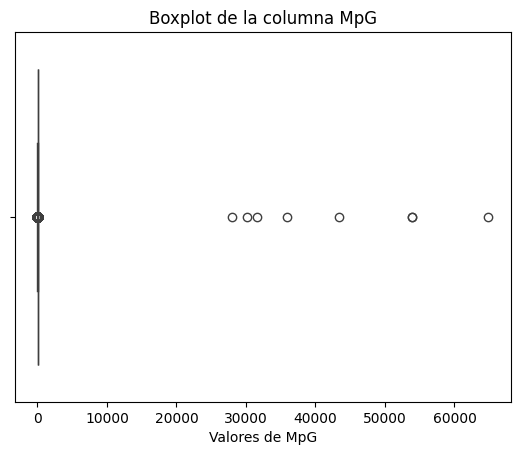

In [26]:
# Crea el boxplot de la columna 'MpG'
sns.boxplot(x='MpG', data=df)

# Configura el título y etiquetas de los ejes
plt.title('Boxplot de la columna MpG')
plt.xlabel('Valores de MpG')

# Muestra el boxplot
plt.show()

Podemos observar que la estructura de nuestro gráfico se ve bastante alterada a razón de los outliers, incluso haciendo casi imperceptible nuestra caja y bigotes, por lo tanto ahora identificaremos nuestros outliers:

In [27]:
# Calcula el IQR
Q1 = df['MpG'].quantile(0.25)
Q3 = df['MpG'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra los outliers
outliers = df[(df['MpG'] < lower_bound) | (df['MpG'] > upper_bound)]

# Imprime la cantidad de outliers
print("Número de outliers en la columna MpG:", len(outliers))

Número de outliers en la columna MpG: 4118


Encontramos 4118 outliers con los parámetros dados, siendo estos un porcentaje muy pequeño de nuestro dataset, simplemente los eliminaremos.

In [28]:
# Filtra las filas sin outliers
df = df[(df['MpG'] >= lower_bound) & (df['MpG'] <= upper_bound)]

Imprimimos Conteo de valores y revisaremos nulos, para asegurarnos de que los outliers fueron eliminados.

In [29]:
conteo_valores = df['MpG'].value_counts()
print("----------------------- V.COUNT -----------------------")
print(conteo_valores)
print("------------------------ NULL -------------------------")
print(df["MpG"].isnull().sum())

----------------------- V.COUNT -----------------------
MpG
23.5    7709
22.5    7466
21.5    7399
24.5    6211
21.0    5865
19.5    4915
20.5    4870
26.5    4724
22.0    4694
25.5    4617
23.0    4602
25.0    4484
24.0    4460
18.5    4427
27.5    4275
27.0    4120
29.5    3901
20.0    3737
19.0    3723
26.0    3535
28.5    3515
28.0    3277
18.0    3103
29.0    2664
30.0    2612
32.0    2378
30.5    1948
17.5    1893
16.5    1781
31.0    1611
17.0    1600
33.5    1560
32.5    1519
31.5    1423
33.0    1395
34.0     999
35.0     968
15.5     863
15.0     847
16.0     844
34.5     620
36.0     470
35.5     437
37.0     338
36.5     221
14.5     178
14.0     152
13.5     104
13.0      82
12.0      77
12.5      51
11.5      24
Name: count, dtype: int64
------------------------ NULL -------------------------
0


Se puede observar que los valores se encuentran dentro de lo normal y los outliers fueron eliminados. Repetiremos el boxplot para ver si esta vez obtenemos un resultado más cercano a lo esperado.

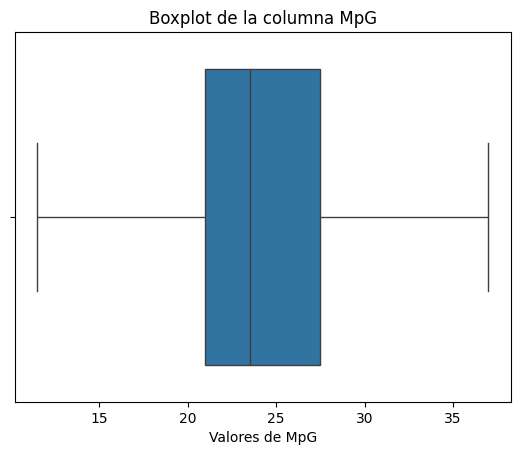

In [30]:
# Crea el boxplot de la columna 'MpG'
sns.boxplot(x='MpG', data=df)

# Configura el título y etiquetas de los ejes
plt.title('Boxplot de la columna MpG')
plt.xlabel('Valores de MpG')

# Muestra el boxplot
plt.show()

Vemos que esta vez el gráfico esta dentro de lo esperado, con una buena distribución, por lo que damos por procesada esta columna, eliminando la original.

In [31]:
df = df.drop(columns=['MPG'])

## Tratamiento de NaN

Si bien con las transformaciones realizadas con anterioridad, para estructurar mejor nuestro dataset, ya lidiamos con los NaN de algunas columnas, ahora veremos como se encuentran las columnas restantes en este aspecto.

In [32]:
print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


name                           0.000000
money                          0.000000
Exterior color                 1.119982
Interior color                 8.231147
Drivetrain                     0.121331
Fuel type                      0.453018
Transmission                   0.199586
Engine                         0.013641
Mileage                        0.022256
Clean title                   88.665212
brand                          0.000000
Year                           0.000000
Model                          0.000000
currency                       0.000000
Adaptive Cruise Control        0.000000
Heated Seats                   0.000000
Cooled Seats                   0.000000
Keyless Start                  0.000000
Navigation System              0.000000
Power Liftgate                 0.000000
Remote Start                   0.000000
Heated Steering Wheel          0.000000
Apple CarPlay/Android Auto     0.000000
USB Port                       0.000000
Premium Sound System           0.000000


Podemos observar que tenemos varias columnas con NaN, primero eliminaremos todas las filas de aquellas columnas con menos de un 1% de valores NaN ya que hacerlo no tendrá un impacto mayor en nuestro análisis, sobre todo teniendo en cuenta el tamaño de nuestro dataset.

In [33]:
df.dropna(subset = ["Drivetrain","Fuel type","Transmission","Engine","Mileage"], inplace = True)

Veremos como se estructura ahora nuestro dataset después de haber hecho nuestro primer tratamiento:

In [34]:
print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


name                           0.000000
money                          0.000000
Exterior color                 1.107316
Interior color                 8.172423
Drivetrain                     0.000000
Fuel type                      0.000000
Transmission                   0.000000
Engine                         0.000000
Mileage                        0.000000
Clean title                   88.681498
brand                          0.000000
Year                           0.000000
Model                          0.000000
currency                       0.000000
Adaptive Cruise Control        0.000000
Heated Seats                   0.000000
Cooled Seats                   0.000000
Keyless Start                  0.000000
Navigation System              0.000000
Power Liftgate                 0.000000
Remote Start                   0.000000
Heated Steering Wheel          0.000000
Apple CarPlay/Android Auto     0.000000
USB Port                       0.000000
Premium Sound System           0.000000


Vemos que nos quedan solamente 3 columnas con valores NaN, primero tenemos el caso de Exterior color e Interior color, como este es un dato categórico y que puede ser de importancia, reemplazaremos estos NaN con la moda de cada columna.

In [35]:
df["Exterior color"].fillna(df["Exterior color"].mode()[0], inplace = True)
df["Interior color"].fillna(df["Interior color"].mode()[0], inplace = True)

Observamos nuevamente nuestro dataset:

In [36]:
print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


name                           0.000000
money                          0.000000
Exterior color                 0.000000
Interior color                 0.000000
Drivetrain                     0.000000
Fuel type                      0.000000
Transmission                   0.000000
Engine                         0.000000
Mileage                        0.000000
Clean title                   88.681498
brand                          0.000000
Year                           0.000000
Model                          0.000000
currency                       0.000000
Adaptive Cruise Control        0.000000
Heated Seats                   0.000000
Cooled Seats                   0.000000
Keyless Start                  0.000000
Navigation System              0.000000
Power Liftgate                 0.000000
Remote Start                   0.000000
Heated Steering Wheel          0.000000
Apple CarPlay/Android Auto     0.000000
USB Port                       0.000000
Premium Sound System           0.000000


Podemos ver que esta vez solo nos queda una columna con NaN, y que estos componen un 88.7% de dicha columna, esta columna llamada Clean Title no parece contener información relevante suficiente para nuestro estudio, por lo tanto la eliminaremos de nuestro dataset.

In [37]:
# Eliminamos la columna "Clean Title" ya que posee un alto grado de NaN y no brinda información relevante
df = df.drop(columns=['Clean title'])

Observamos la estructura de nuestro dataset concerniente a los NaN por última vez:

In [38]:
print("-------------- NULL (%) ---------------")
df.isnull().sum()/df.shape[0] * 100

-------------- NULL (%) ---------------


name                          0.0
money                         0.0
Exterior color                0.0
Interior color                0.0
Drivetrain                    0.0
Fuel type                     0.0
Transmission                  0.0
Engine                        0.0
Mileage                       0.0
brand                         0.0
Year                          0.0
Model                         0.0
currency                      0.0
Adaptive Cruise Control       0.0
Heated Seats                  0.0
Cooled Seats                  0.0
Keyless Start                 0.0
Navigation System             0.0
Power Liftgate                0.0
Remote Start                  0.0
Heated Steering Wheel         0.0
Apple CarPlay/Android Auto    0.0
USB Port                      0.0
Premium Sound System          0.0
Bluetooth                     0.0
HomeLink                      0.0
Rear Seat Entertainment       0.0
Memory Seat                   0.0
Third Row Seating             0.0
Leather Seats 

In [39]:
print("------------------------ SHAPE ------------------------")
print(df.shape)

------------------------ SHAPE ------------------------
(138172, 43)


Viendo que ya no existen columnas con NaN en su contenido y observando la cantidad de filas restantes, siendo aún una cantidad robusta para estudio, podemos dar por finalizado el tratamiento de NaNs.

## Últimos arreglos

Ahora, solo por comodidad renombraremos algunas columnas y cambiaremos el orden de las mismas.

In [40]:
df = df.rename(columns={'money': 'Price'})
df = df.rename(columns={'name': 'Name'})
df = df.rename(columns={'brand': 'Brand'})
df = df.rename(columns={'currency': 'Currency'})
df = df.rename(columns={'MpG': 'MPG'})

In [41]:
nuevo_orden_columnas = [
    'Name', 'Price', 'New', 'Brand', 'Year', 'Model', 'Personal Use Only', 'Accidents or Damage', '1-owner Vehicle',
    'Exterior color', 'Interior color', 'Drivetrain', 'MPG', 'Fuel type', 'Transmission', 'Engine',
    'Mileage', 'Currency', 'Adaptive Cruise Control', 'Heated Seats', 'Cooled Seats',
    'Keyless Start', 'Navigation System', 'Power Liftgate', 'Remote Start', 'Heated Steering Wheel',
    'Apple CarPlay/Android Auto', 'USB Port', 'Premium Sound System', 'Bluetooth', 'HomeLink', 'Rear Seat Entertainment',
    'Memory Seat', 'Third Row Seating', 'Leather Seats', 'Blind Spot Monitor', 'Rear Cross Traffic Alert',
    'Backup Camera', 'Lane Departure Warning', 'Alloy Wheels', 'Sunroof/Moonroof', 'Tow Hitch', 'Tow Hooks'
]

# Reorganizar las columnas en el DataFrame
df = df[nuevo_orden_columnas]

Imprimiremos el info de nuestro dataset para cerciorarnos de que no existe problema alguno.

In [42]:
print("------------------------ INFO -------------------------")
print(df.info())

------------------------ INFO -------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 138172 entries, 0 to 175489
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        138172 non-null  object 
 1   Price                       138172 non-null  int64  
 2   New                         138172 non-null  int64  
 3   Brand                       138172 non-null  object 
 4   Year                        138172 non-null  int64  
 5   Model                       138172 non-null  object 
 6   Personal Use Only           138172 non-null  int64  
 7   Accidents or Damage         138172 non-null  int64  
 8   1-owner Vehicle             138172 non-null  int64  
 9   Exterior color              138172 non-null  object 
 10  Interior color              138172 non-null  object 
 11  Drivetrain                  138172 non-null  object 
 12  MPG                  

## EDA

Exploraremos la columna Price ya que está directamente relacionada con nuestras hipótesis.

In [43]:
print("------------------- DESCRIBE (Price) -------------------")
df["Price"].describe()

------------------- DESCRIBE (Price) -------------------


count    1.381720e+05
mean     3.055236e+04
std      2.068376e+04
min      1.895000e+03
25%      1.899500e+04
50%      2.659900e+04
75%      3.626950e+04
max      2.200000e+06
Name: Price, dtype: float64

Podemos observar que hay diferencias significativas en la notación decimal por lo que buscaremos nuestros valores mínimos y máximos.

In [44]:
print ("Min:")
print (df['Price'].min())
print ("Max:")
print (df['Price'].max())

Min:
1895
Max:
2200000


Confirmando lo observado anteriormente, podemos ver una gran diferencia entre el valor mínimo y máximo. Realizaremos un Boxplot para hacernos una idea más global de la distribución de esta columna.

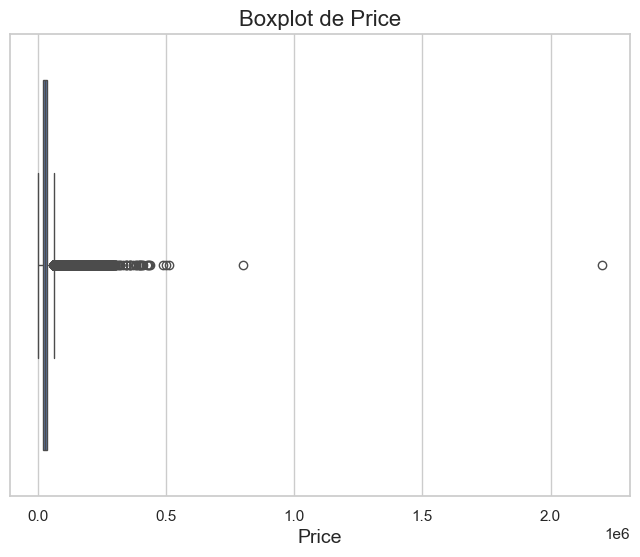

In [45]:
sns.set(style="whitegrid")  # Configura el estilo del boxplot

plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura

sns.boxplot(x=df["Price"])  # Crea el boxplot de la variable "Price" en tu DataFrame

plt.title("Boxplot de Price", fontsize=16)  # Agrega un título al gráfico
plt.xlabel("Price", fontsize=14)  # Etiqueta del eje x

plt.show()  # Muestra el boxplot

Vemos que existen algunos outliers que no nos permiten observar correctamente nuestro gráfico, por lo tanto calcularemos cuartiles, determinando y eliminando outliers.

In [46]:
# Calcula el rango intercuartil (IQR) de la columna 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Elimina las filas que contienen outliers en la columna 'Price'
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Puedes usar reset_index() para restablecer los índices del DataFrame si es necesario
df = df.reset_index(drop=True)

print("------------------- DESCRIBE (Price) -------------------")
df["Price"].describe()

------------------- DESCRIBE (Price) -------------------


count    131476.000000
mean      27501.335605
std       11644.314182
min        1895.000000
25%       18750.000000
50%       25940.000000
75%       34595.000000
max       62180.000000
Name: Price, dtype: float64

Podemos observar rangos más razonables a primera vista, graficaremos boxplot nuevamente.

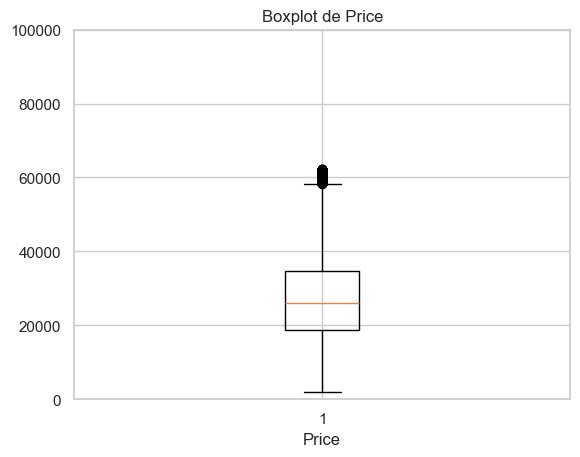

In [47]:
# Ajusta el rango del eje "Price"
plt.ylim(0, 100000)  # Reemplaza 100000 con el valor máximo deseado

# Crea un boxplot vertical de la columna "Price"
plt.boxplot(df['Price'], vert=True)

# Añade etiquetas al gráfico
plt.title('Boxplot de Price')
plt.xlabel('Price')

# Muestra el gráfico
plt.show()

Ahora podemos observar el gráfico de buena manera y hemos eliminado los outliers que podrían causar problemas con el modelo. Habiendo tratado la columna precio podemos comenzar a desarrollar nuestras hipótesis.

## **Hipótesis Primaria**:
Los vehículos nuevos tienen un precio promedio significativamente más alto que los vehículos usados en la base de datos.

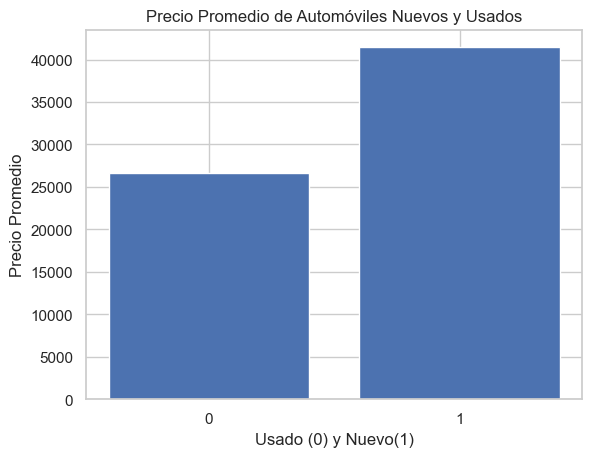

In [67]:
# Agrupa los datos por la columna "New" y calcula el precio promedio para cada categoría
data = df.groupby("New")["Price"].mean()

# Crea un gráfico de barras
plt.bar(data.index, data.values)
plt.xlabel("Usado (0) y Nuevo(1)")
plt.ylabel("Precio Promedio")
plt.xticks([0, 1], data.index)  # Establece las etiquetas en el eje x
plt.title("Precio Promedio de Automóviles Nuevos y Usados")
plt.show()

Podemos observar que el precio promedio de los autos nuevos es casi 15 mil dólares mayor que el precio de los autos usados. Por lo tanto nuestra Hipótesis resulta ser cierta.

## **Hipótesis Secundaria 1**:
El tipo de combustible afecta de manera significativa el precio de los vehículos.

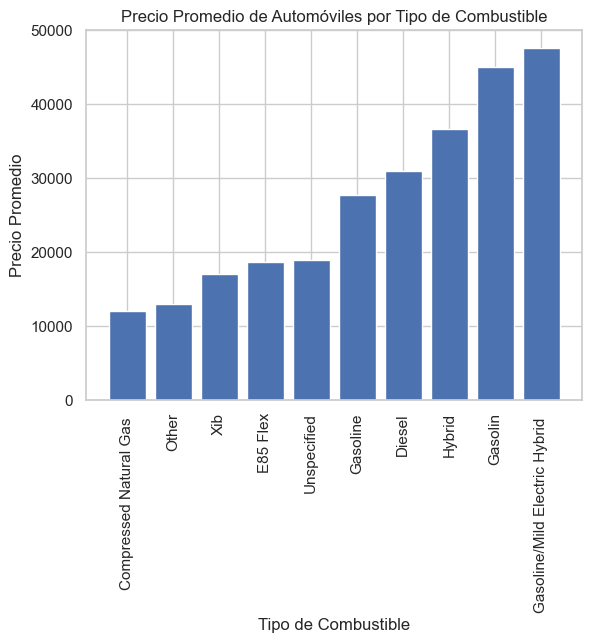

In [49]:
# Agrupa los datos por la columna "Fuel type" y calcula el precio promedio para cada categoría
data = df.groupby("Fuel type")["Price"].mean()

# Ordena los datos de menor a mayor
data = data.sort_values()

# Crea un gráfico de barras
plt.bar(data.index, data.values)
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio Promedio")
plt.title("Precio Promedio de Automóviles por Tipo de Combustible")
plt.xticks(rotation=90)  # Rotar etiquetas para una mejor legibilidad si es necesario
plt.show()

Podemos observar que el precio si se ve afectado por el tipo de combustible que utiliza el vehículo observándose diferencias significativas entre algunos tipos de combustible.

## **Hipótesis Secundaria 2:**
El tipo de transmisión influye en el precio siendo el 4x4 el más caro.

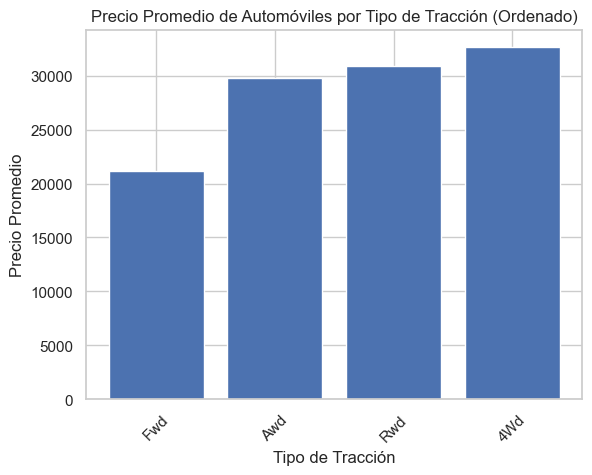

In [50]:
# Agrupa los datos por la columna "Drivetrain" y calcula el precio promedio para cada categoría
data = df.groupby("Drivetrain")["Price"].mean()

# Ordena los datos de menor a mayor precio promedio
data = data.sort_values()

# Crea un gráfico de barras
plt.bar(data.index, data.values)
plt.xlabel("Tipo de Tracción")
plt.ylabel("Precio Promedio")
plt.title("Precio Promedio de Automóviles por Tipo de Tracción (Ordenado)")
plt.xticks(rotation=45)  # Rotar etiquetas para una mejor legibilidad si es necesario
plt.show()

Podemos ver que nuestra hipótesis está en lo correcto, pero que el grado de variación de precios no es amplio.

## **Hipótesis Secundaria 3:**
La eficiencia de combustible (medida en millas por galón, mpg) está positivamente correlacionada con el precio de los vehículos, lo que significa que los vehículos más eficientes en combustible tienden a tener un precio promedio más alto en el mercado.

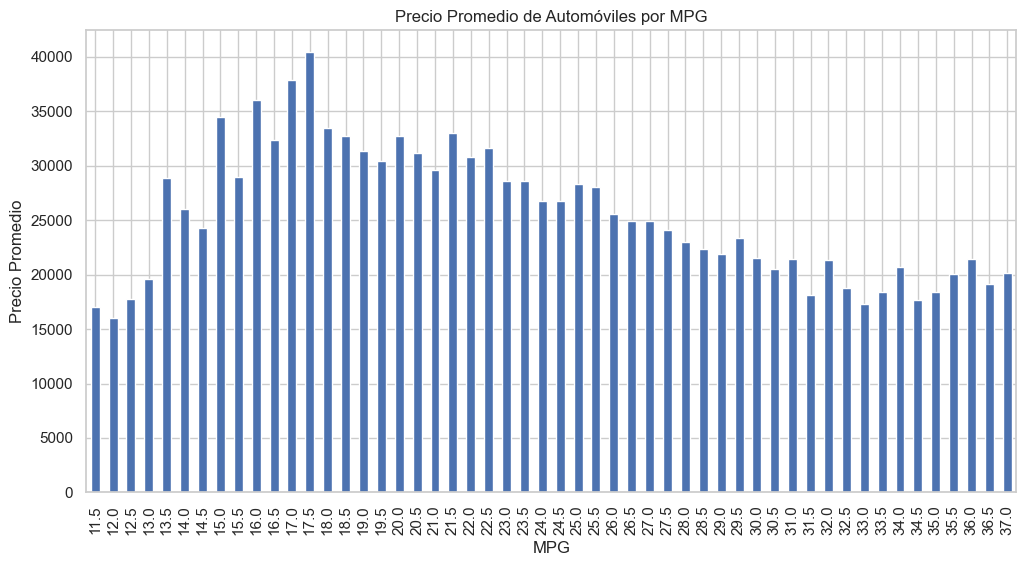

In [51]:
# Agrupar los datos por la columna "MPG" y calcular el promedio de la columna "Price"
data = df.groupby("MPG")["Price"].mean()

# Ajustar el tamaño de la figura para hacerla más ancha
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras
data.plot(kind="bar", rot=90)
plt.xlabel("MPG")
plt.ylabel("Precio Promedio")
plt.title("Precio Promedio de Automóviles por MPG")
plt.show()

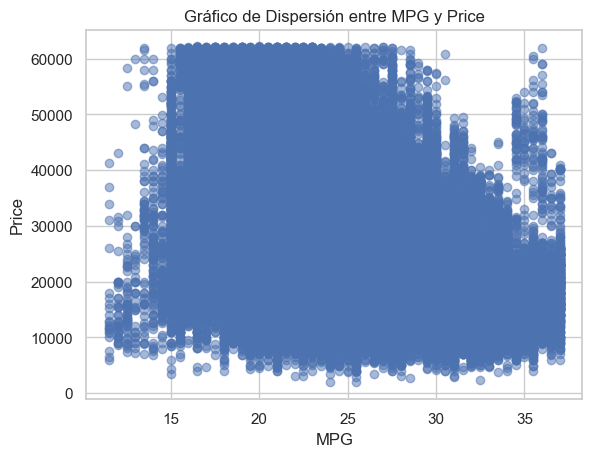

In [52]:
# Crear un gráfico de dispersión entre "MPG" y "Price"
plt.scatter(df["MPG"], df["Price"], alpha=0.5)  # alpha controla la transparencia de los puntos
plt.xlabel("MPG")
plt.ylabel("Price")
plt.title("Gráfico de Dispersión entre MPG y Price")
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.show()

Nuestra hipótesis parece no ser válida ya que no se aprecia una relación positiva clara entre la cantidad de millas por galón y el precio de los automóviles.

## Filter Feature Selection

In [53]:
# Filtra las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Calcula la matriz de correlación
matriz_correlacion = df_numerico.corr(method='pearson')

# Selecciona la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion['Price']

# Calcula el valor absoluto para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)

# Ordena de mayor a menor correlación
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

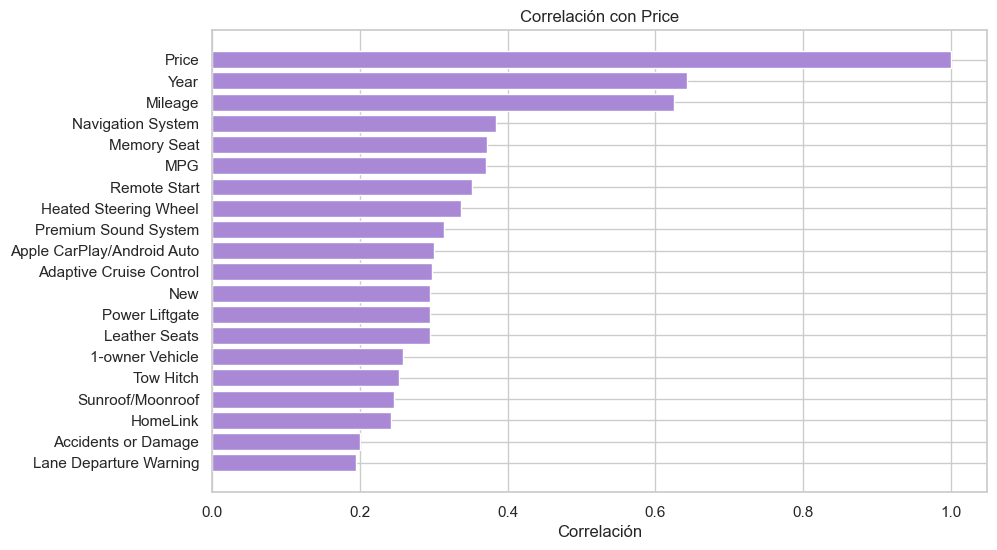

In [54]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Price')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [55]:
# Defino función para hacer la selección de varaibles
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [56]:
# Matriz de Features
X = df[['New', 'Year', 'Personal Use Only', 'Accidents or Damage', '1-owner Vehicle',
        'Mileage', 'Adaptive Cruise Control', 'Heated Seats', 'Cooled Seats',
        'Keyless Start', 'Navigation System', 'Power Liftgate', 'Remote Start',
        'Heated Steering Wheel', 'Apple CarPlay/Android Auto', 'USB Port',
        'Premium Sound System', 'Bluetooth', 'HomeLink', 'Rear Seat Entertainment',
        'Memory Seat', 'Third Row Seating', 'Leather Seats', 'Blind Spot Monitor',
        'Rear Cross Traffic Alert', 'Backup Camera', 'Lane Departure Warning',
        'Alloy Wheels', 'Sunroof/Moonroof', 'Tow Hitch', 'Tow Hooks', "MPG"]]

# Target
y = df['Price']

In [57]:
VARIABLES_ELEGIDAS = forward_selection(data = X,
                                       target = y,
                                       significance_level = 0.01)
print("Quedaron seleccionadas:")
VARIABLES_ELEGIDAS

Quedaron seleccionadas:


['Tow Hitch',
 'New',
 'Power Liftgate',
 'Leather Seats',
 'Apple CarPlay/Android Auto',
 'Mileage',
 'Memory Seat',
 'Rear Cross Traffic Alert',
 'HomeLink',
 'Premium Sound System',
 'Navigation System',
 'Year',
 'USB Port',
 'MPG',
 'Third Row Seating',
 'Heated Seats',
 'Sunroof/Moonroof',
 'Personal Use Only',
 'Accidents or Damage',
 'Tow Hooks',
 'Remote Start',
 'Rear Seat Entertainment',
 '1-owner Vehicle',
 'Backup Camera',
 'Keyless Start',
 'Adaptive Cruise Control',
 'Lane Departure Warning',
 'Cooled Seats']

In [58]:
print('De ' + str(X.shape[1]) + ' features, se seleccionaron ' + str(len(VARIABLES_ELEGIDAS)))

De 32 features, se seleccionaron 28


In [59]:
print("Quedaron fuera:")
elementos_no_en_lista = [x for x in X.columns if x not in VARIABLES_ELEGIDAS]
elementos_no_en_lista

Quedaron fuera:


['Heated Steering Wheel', 'Bluetooth', 'Blind Spot Monitor', 'Alloy Wheels']

## Métricas

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 4438.267768056219


In [62]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 34471796.41190466


In [63]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 5871.2687225083355


In [64]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 8.677826026181483


In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2", r2)

R2 0.7479462998427941


## Conclusiones

<div style="text-align: justify;">
En general, el modelo parece mostrar un rendimiento decente. El RMSE y el MAE no son extremadamente altos, lo que sugiere que las predicciones no están muy alejadas de los valores reales. Además, el R^2 indica que el modelo es capaz de explicar una cantidad significativa de la variabilidad en los precios. Sin embargo, siempre es importante considerar el contexto específico del problema para determinar si este rendimiento es aceptable. Se debe seguir ajustando y mejorando el modelo si se desea reducir aún más el error y aumentar la precisión.
</div>